In [1]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [2]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [4]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [5]:
# Check different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

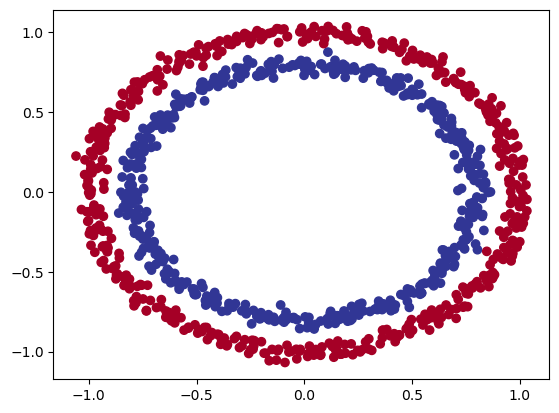

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [7]:
# import torch
# X_tensor = torch.tensor(X)
# y_tensor = torch.tensor(y)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [22]:
from torch import nn
class CirclePredictorV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_0 = CirclePredictorV0().to(device)

In [10]:
# Alternative way to define nn model using Sequential
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

In [11]:
untrained_preds = model_0(X_test_tensor)

In [23]:
print(torch.round(torch.sigmoid(untrained_preds[:5])))
print(y_test_tensor[:5])

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)
tensor([1., 0., 1., 0., 1.])


In [24]:
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [14]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [26]:
epochs = 1000

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train_tensor).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_func(y_logits, y_train_tensor)
    acc = accuracy_fn(y_true=y_train_tensor, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_logits = model_0(X_test_tensor).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_func(test_logits, y_test_tensor)
        test_acc = accuracy_fn(y_true=y_test_tensor, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 10 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 20 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 30 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 40 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 50 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 60 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 70 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 80 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 90 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 100 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 110 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epo

In [16]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


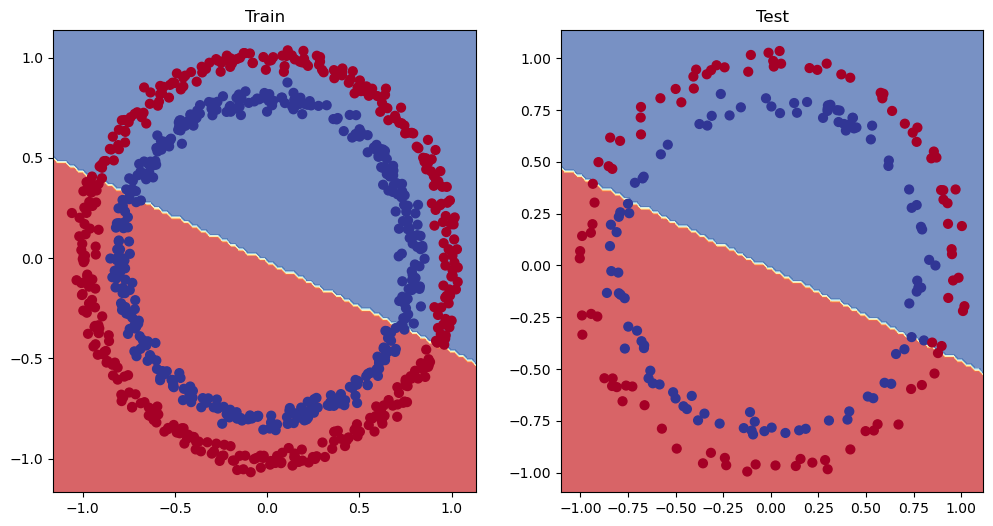

In [27]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train_tensor, y_train_tensor)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test_tensor, y_test_tensor)

In [33]:
# model accuracy barely exceed 50%, it becase we need to predict a non linear function as the dataset is not linear
# but the model is linear.  so lets define a new model.

class CirclePredictorV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu((self.layer_1(x))))))

model_1 = CirclePredictorV1().to(device)
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [34]:
epochs = 1000

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train_tensor).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_func(y_logits, y_train_tensor)
    acc = accuracy_fn(y_true=y_train_tensor, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_logits = model_1(X_test_tensor).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_func(test_logits, y_test_tensor)
        test_acc = accuracy_fn(y_true=y_test_tensor, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70537, Accuracy: 50.00% | Test loss: 0.70350, Test acc: 50.00%
Epoch: 10 | Loss: 0.69695, Accuracy: 50.00% | Test loss: 0.69606, Test acc: 50.00%
Epoch: 20 | Loss: 0.69330, Accuracy: 50.00% | Test loss: 0.69295, Test acc: 50.00%
Epoch: 30 | Loss: 0.69156, Accuracy: 50.00% | Test loss: 0.69148, Test acc: 50.00%
Epoch: 40 | Loss: 0.69060, Accuracy: 48.75% | Test loss: 0.69068, Test acc: 52.00%
Epoch: 50 | Loss: 0.68999, Accuracy: 50.88% | Test loss: 0.69015, Test acc: 53.00%
Epoch: 60 | Loss: 0.68953, Accuracy: 51.25% | Test loss: 0.68972, Test acc: 52.50%
Epoch: 70 | Loss: 0.68913, Accuracy: 53.62% | Test loss: 0.68933, Test acc: 54.50%
Epoch: 80 | Loss: 0.68876, Accuracy: 54.25% | Test loss: 0.68897, Test acc: 56.00%
Epoch: 90 | Loss: 0.68841, Accuracy: 54.87% | Test loss: 0.68860, Test acc: 57.50%
Epoch: 100 | Loss: 0.68805, Accuracy: 55.62% | Test loss: 0.68824, Test acc: 58.00%
Epoch: 110 | Loss: 0.68769, Accuracy: 56.25% | Test loss: 0.68786, Test acc: 59.50%
Epo

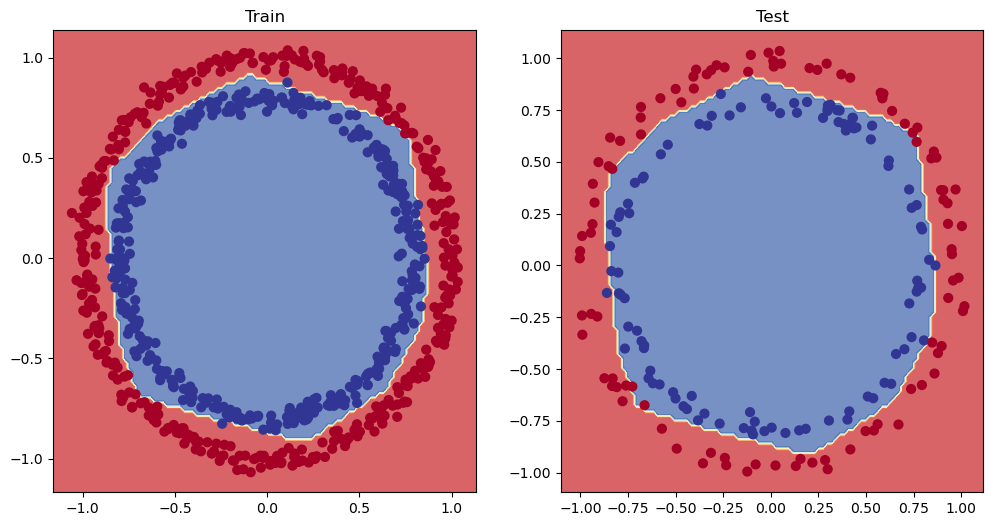

In [35]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train_tensor, y_train_tensor)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test_tensor, y_test_tensor)

In [36]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

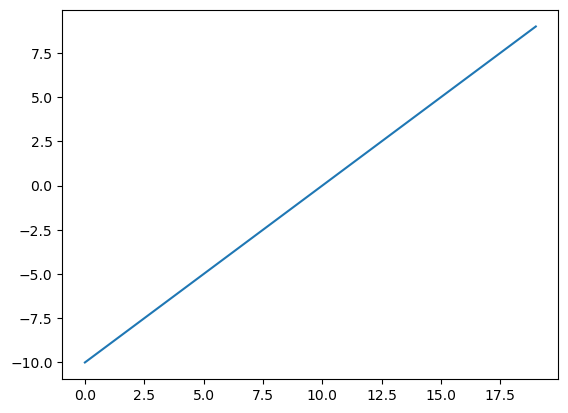

In [37]:
plt.plot(A)

In [42]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

B = relu(A)

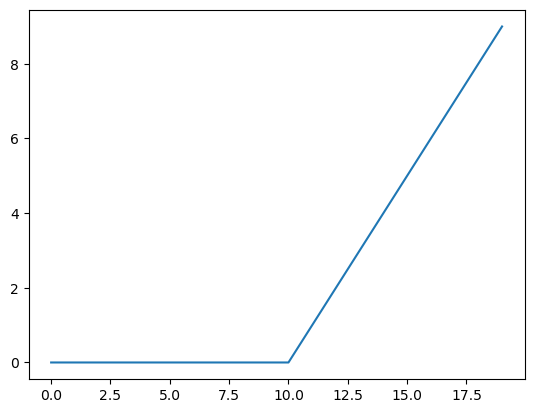

In [44]:
plt.plot(B)

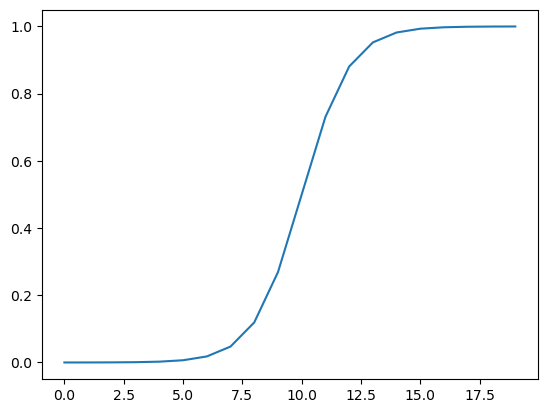

In [46]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

C = sigmoid(A)
plt.plot(C)